# Importing Libraries and data file

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/content/drive/MyDrive/Shack labs/DS - Assignment Part 1 data set.xlsx")

In [3]:
data.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# Observations

In [4]:
data.shape

(414, 9)

In [5]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [6]:
data.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [7]:
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [8]:
data.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

**General obseravtion regarding the data:**
*   Data consists of total 414 rows and 9 columns including target columns.
*   No null values were found in the data
*   All features were either integer type or float data type, so no need for data type conversion required.
*   Target is an continous variable, "prediction of house prices so Regression model will be used"



# EDA - Exploratory Data Analysis

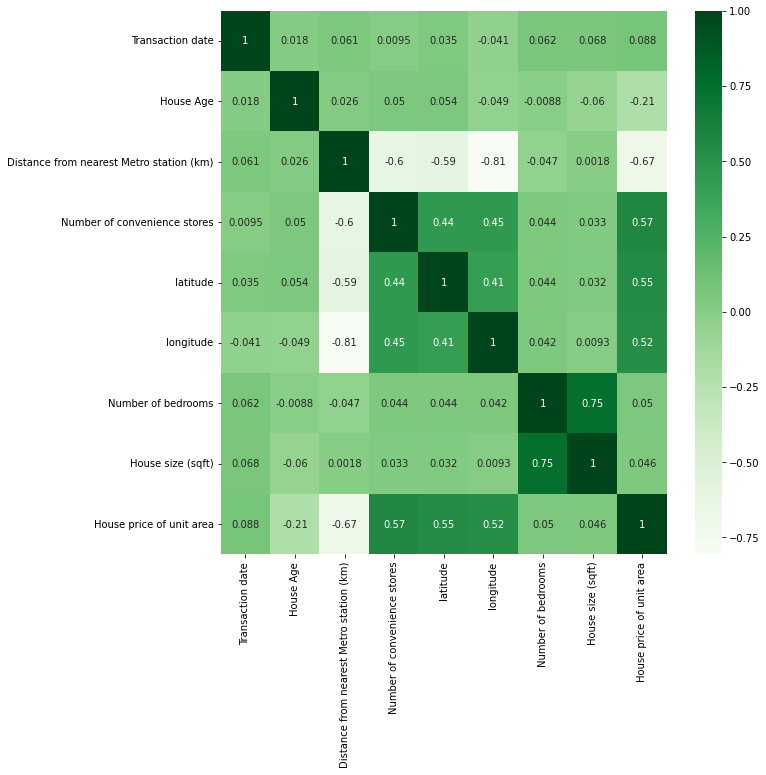

In [9]:
## generating correlation map
plt.figure(figsize=(10,10)),
sns.heatmap(data=data.corr(), annot=True, cmap='Greens')

In [10]:
correlation = data.corr()
correlation['House price of unit area'].sort_values(ascending=False)

House price of unit area                    1.000000
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64

In [11]:
for i in data.columns:
  print(i)
  print(f"min val is {min(data[i])}, max value is {max(data[i])}")
  print()

Transaction date
min val is 2012.6666667, max value is 2013.5833333

House Age
min val is 0.0, max value is 43.8

Distance from nearest Metro station (km)
min val is 23.38284, max value is 6488.021

Number of convenience stores
min val is 0, max value is 10

latitude
min val is 24.93207, max value is 25.01459

longitude
min val is 121.47353, max value is 121.56627

Number of bedrooms
min val is 1, max value is 3

House size (sqft)
min val is 402, max value is 1500

House price of unit area
min val is 7.6, max value is 117.5



In [12]:
final_data = pd.read_excel("/content/drive/MyDrive/Shack labs/DS - Assignment Part 1 data set.xlsx")

In [13]:
for i in final_data.columns:
  final_data[i]=final_data[i].div(max(final_data[i]))

In [56]:
final_data.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,0.999669,0.730594,0.013082,1.0,0.998736,0.999786,0.333333,0.383333,0.322553
1,0.999669,0.445205,0.047256,0.9,0.998631,0.999780,0.666667,0.826667,0.359149
2,1.000000,0.303653,0.086619,0.5,0.998915,0.999816,1.000000,0.706667,0.402553
3,0.999959,0.303653,0.086619,0.5,0.998915,0.999816,0.666667,0.583333,0.466383
4,0.999628,0.114155,0.060198,0.5,0.998592,0.999804,0.333333,0.327333,0.366809


# Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [16]:
x = data.drop("House price of unit area",axis=1)    ## features
y = data[data.columns[-1]]   ## target variable

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=3)

In [18]:
model = LinearRegression()      ## loading the LinearRegression model 
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)       ## predicting the values of quality using model.prediction and testing data

In [20]:
## making an pandas dataframe of actual and prediction vlaues
results = pd.DataFrame({"actual":y_test,"prediction":y_pred})

In [21]:
print(results)

     actual  prediction
161    39.6   41.470618
130    37.5   44.783512
227    40.2   43.596899
103    45.7   43.659967
240    28.8   33.017363
..      ...         ...
142    37.5   40.843002
154    20.7   16.130271
254    51.8   46.705635
290    37.0   31.485474
340    42.9   35.042379

[83 rows x 2 columns]


In [22]:
print("mean absolute error = ",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error =",metrics.mean_squared_error(y_test,y_pred))

mean absolute error =  6.851620048373424
mean squared error = 77.44902478430922


In [23]:
print(r2_score(y_test,y_pred))

0.6009985285272674


In [24]:
# print("mean absolute error = ",metrics.mean_absolute_error(y_test,y_pred))
# print("mean squared error =",metrics.mean_squared_error(y_test,y_pred))

In [25]:
# print(r2_score(y_test,y_pred))

# Random forest regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [31]:
prediction = regr.predict(x_test)

In [32]:
print(r2_score(y_test,prediction))

0.6796080633469781


# Neural network regression

In [ ]:
pip install numpy --upgrade ## encountered an error as  module compiled against API version 0xe but this version of numpy is 0xd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 26.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.21.6 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.


In [33]:
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [34]:
def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [35]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [51]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=50, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
5/5 [==============================] - 1s 37ms/step - loss: 0.0389 - mean_squared_logarithmic_error: 0.0400 - val_loss: 0.0721 - val_mean_squared_logarithmic_error: 0.0532
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0247 - mean_squared_logarithmic_error: 0.0239 - val_loss: 0.0859 - val_mean_squared_logarithmic_error: 0.0720
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0261 - mean_squared_logarithmic_error: 0.0261 - val_loss: 0.0775 - val_mean_squared_logarithmic_error: 0.0644
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0229 - mean_squared_logarithmic_error: 0.0205 - val_loss: 0.0764 - val_mean_squared_logarithmic_error: 0.0509
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0197 - mean_squared_logarithmic_error: 0.0276 - val_loss: 0.0764 - val_mean_squared_logarithmic_error: 0.0536
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0210 - mean_squar

In [52]:
prediction = model.predict(x_test_scaled)

3/3 [==============================] - 0s 5ms/step


In [53]:
print(r2_score(y_test,prediction))

0.6327764007497148


# Pycaret


In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Shack labs/DS - Assignment Part 1 data set.xlsx")

In [ ]:
import numpy

In [ ]:
# init setup
from pycaret.regression import *

clf1 = setup(data = df, target = 'House price of unit area')	
# compare models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.9285,4.896750e+01,6.7516,0.7211,0.1869,0.1500,0.391
et,Extra Trees Regressor,5.0919,4.954010e+01,6.8133,0.7174,0.1889,0.1558,0.389
gbr,Gradient Boosting Regressor,4.9599,5.040230e+01,6.8287,0.7137,0.1868,0.1497,0.050
lightgbm,Light Gradient Boosting Machine,5.1409,4.980060e+01,6.8804,0.7136,0.1898,0.1542,0.067
ada,AdaBoost Regressor,5.5333,5.530150e+01,7.2450,0.6808,0.2078,0.1744,0.059
knn,K Neighbors Regressor,6.1515,6.871400e+01,8.1789,0.5936,0.2234,0.1845,0.059
lr,Linear Regression,5.9782,6.989520e+01,8.2371,0.5904,0.2324,0.1841,0.359
ridge,Ridge Regression,6.5644,7.932800e+01,8.8038,0.5376,0.2624,0.2067,0.018
dt,Decision Tree Regressor,6.3538,8.245970e+01,8.8997,0.5152,0.2276,0.1829,0.014
huber,Huber Regressor,6.7041,8.552380e+01,9.1576,0.5075,0.3064,0.2132,0.029


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=8239, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=8239, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…